In [6]:
"""Progetto_gruppo3.ipynb
"""

#%% IMPORT SECTION
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from random import randint

#%% DIRECTORY SETTINGS
# Change work directory
os.chdir('//srv0001/Risorse/Public/Gruppo3-Python')
cwd = os.getcwd()
print(cwd)


#%% PREPARE FUNCTION
def prepare_data(data):
   
    features = data.drop(["REF_DATE", "SEDOLCHK", "ICB_INDUSTRY_NUM", "ICB_SECTOR_NUM"], axis=1).astype("float64")
        
    return features


\\srv0001\Risorse\Public\Gruppo3-Python


In [2]:
#%% IMPORT DATA
#Import .csv
clean_data = pd.read_csv(r'Data/clean2.csv', sep=',')

for col in clean_data.columns:
        if clean_data[col].dtype==object and col!='SEDOLCHK':
            clean_data[col]=pd.to_numeric(clean_data[col],errors='coerce')
        
companynames = pd.read_csv(r'Data/companynames.csv', sep=',')
companynames = companynames.drop_duplicates(subset = "SEDOLCHK")

#print(clean_data.head(10))

referenceDate = clean_data["REF_DATE"].drop_duplicates().reset_index(drop = True)

print(referenceDate.head(10))

sectors_dict = {'1':'Oil & Gas','1000':'Basic Materials','2000':'Industrial',
'3000':'Consumer Good','4000':'Health Care','5000':'Consumer Services',
'6000':'Telecomunications','7000':'Utilities','8000':'Financials',
'9000':'Technology'}

0    20050429
1    20050531
2    20050630
3    20050729
4    20050831
5    20050930
6    20051031
7    20051130
8    20051230
9    20060131
Name: REF_DATE, dtype: int64


16


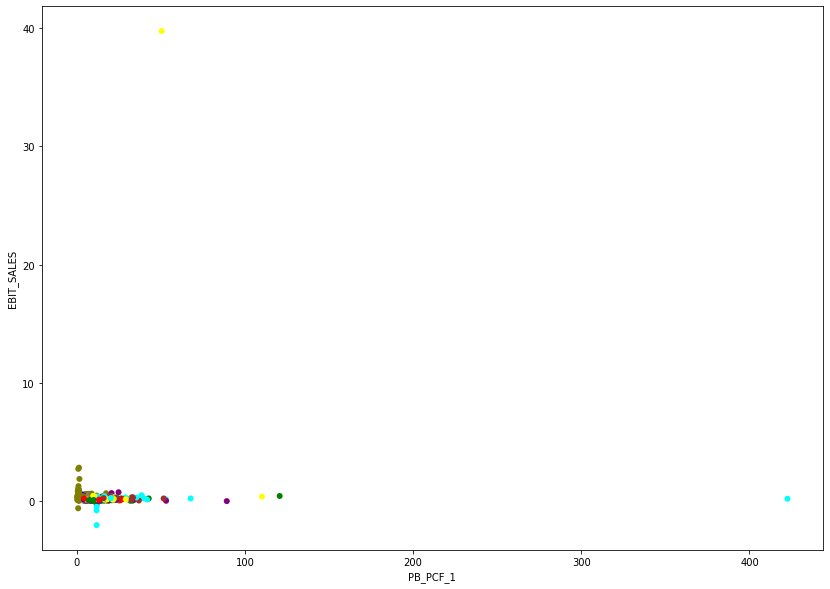

In [40]:
one_month_data = clean_data[(clean_data.REF_DATE==20181031)].copy()
colors_dict = {'1':'blue','1000':'red','2000':'green',
'3000':'yellow','4000':'cyan','5000':'purple',
'6000':'orange','7000':'grey','8000':'olive',
'9000':'brown'}

one_month_data["ICB_INDUSTRY_NUM"] = one_month_data["ICB_INDUSTRY_NUM"].astype(str)
one_month_data["ICB_INDUSTRY_NUM"] = one_month_data["ICB_INDUSTRY_NUM"].map(colors_dict)

n_col=len(one_month_data.columns)

col_to_plot = np.random.randint(2, n_col-2, size=2)
print(col_to_plot[0])

#col1 = one_month_data.columns[col_to_plot[0]]
#col2 = one_month_data.columns[col_to_plot[1]]

col1 = 'PB_PCF_1'
col2 = 'EBIT_SALES'

x = one_month_data[col1]
y = one_month_data[col2]
color = one_month_data['ICB_INDUSTRY_NUM']

fig, ax = plt.subplots(figsize=(14, 10))

ax.scatter(x, y, c=color, label=color, edgecolors='none')

ax.set_xlabel(col1)
ax.set_ylabel(col2)

#ax.grid(True)

plt.show()